**Seeding for reproducibility**

In [11]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)
;
import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [12]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

In [ ]:
# # Unzip the downloaded dataset
# with ZipFile("dataset.zip", 'r') as zip_ref:
#     zip_ref.extractall()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Change the directory to your 'Project' folder
project_path = '/content/drive/My Drive/Projectcodes'  # Adjust the path if necessary
os.chdir(project_path)

# Verify the change
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive/Projectcodes


In [3]:
print(os.listdir("Dataset"))


print(len(os.listdir("Dataset/Bambusa_vulgaris(Golden_Bamboo)")))
print(os.listdir("Dataset/Bambusa_vulgaris(Golden_Bamboo)")[:5])

# print(len(os.listdir("plantvillage dataset/color")))
# print(os.listdir("plantvillage dataset/color")[:5])

# print(len(os.listdir("plantvillage dataset/grayscale")))
# print(os.listdir("plantvillage dataset/grayscale")[:5])

['Bambusa_vulgaris(Golden_Bamboo)', 'Dendrocalamus_giganteus(Giant_Bamboo)', 'U72RT', 'new_green']
500
['574rotated0.jpg', '643rotated90.jpg', '588rotated90.jpg', '185rotated180.jpg', '534rotated0.jpg']


**Number of Classes = 38**

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['05cff9d7-0f63-4b6e-9aa3-199cf9ffa64c___Mt.N.V_HL 9111.JPG', '0ce12a10-c6ff-494e-a927-5ddc809c707a___Mt.N.V_HL 8945.JPG', 'c839e134-6692-4065-8e12-7ea01adcc794___Mt.N.V_HL 9014.JPG', '452823c1-22d2-4bce-a4cc-8ad014421261___Mt.N.V_HL 6199.JPG', 'c48a4277-3bd4-45c8-be06-8bdc4404f252___Mt.N.V_HL 6137.JPG']


**Data Preprocessing**

In [6]:
# Dataset Path
base_dir = '/content/drive/My Drive/Projectcodes/Dataset'

(224, 224, 3)


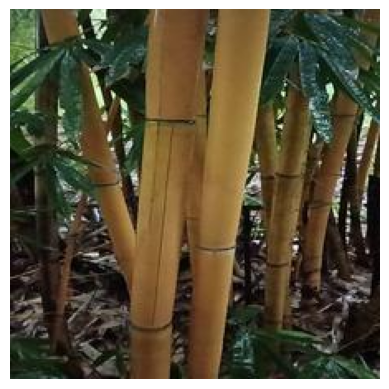

In [8]:
# Import the necessary library
import matplotlib.image as mpimg
import matplotlib.pyplot as plt # Import pyplot

image_path = '/content/drive/My Drive/Projectcodes/Dataset/Bambusa_vulgaris(Golden_Bamboo)/534rotated0.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [10]:
image_path = '/content/drive/My Drive/Projectcodes/Dataset/Bambusa_vulgaris(Golden_Bamboo)/534rotated0.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[ 85 110  78]
  [ 63  90  57]
  [ 63  90  59]
  ...
  [ 66  55  27]
  [ 70  59  29]
  [ 65  54  24]]

 [[ 99 124  92]
  [ 98 125  92]
  [ 63  90  59]
  ...
  [ 76  62  35]
  [ 80  66  37]
  [ 77  63  34]]

 [[ 96 121  89]
  [ 93 120  87]
  [ 57  84  51]
  ...
  [ 71  55  29]
  [ 72  57  28]
  [ 72  57  28]]

 ...

 [[ 26  38  26]
  [ 21  33  21]
  [ 18  30  18]
  ...
  [ 36  49  31]
  [ 85  94  77]
  [119 128 111]]

 [[ 25  39  26]
  [ 20  34  21]
  [ 20  34  21]
  ...
  [ 33  48  27]
  [ 61  73  53]
  [ 99 111  91]]

 [[ 37  51  38]
  [ 32  46  33]
  [ 32  46  33]
  ...
  [ 68  83  60]
  [ 47  60  40]
  [ 59  71  51]]]


In [13]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [14]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [15]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 1390 images belonging to 4 classes.


In [16]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 347 images belonging to 4 classes.


**Convolutional Neural Network**

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models

img_size = 224

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.25))  # Dropout after the first Conv layer

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.75))  # Dropout after the second Conv layer

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.75))   # Dropout before the final layer
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [24]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)       

In [29]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [30]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
43/43 [==============================] - 175s 4s/step - loss: 2.2927 - accuracy: 0.3741 - val_loss: 1.1128 - val_accuracy: 0.6594
Epoch 2/5
43/43 [==============================] - 182s 4s/step - loss: 0.4882 - accuracy: 0.8056 - val_loss: 0.2670 - val_accuracy: 0.9781
Epoch 3/5
43/43 [==============================] - 184s 4s/step - loss: 0.1145 - accuracy: 0.9720 - val_loss: 0.1539 - val_accuracy: 0.9750
Epoch 4/5
43/43 [==============================] - 182s 4s/step - loss: 0.0455 - accuracy: 0.9838 - val_loss: 0.0366 - val_accuracy: 1.0000
Epoch 5/5
43/43 [==============================] - 175s 4s/step - loss: 0.0331 - accuracy: 0.9882 - val_loss: 0.0703 - val_accuracy: 0.9812


**Model Evaluation**

In [31]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
10/10 [==============================] - 11s 1s/step - loss: 0.0747 - accuracy: 0.9781
Validation Accuracy: 97.81%


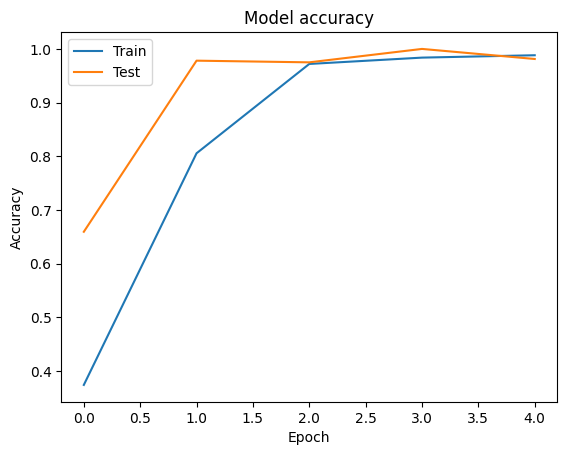

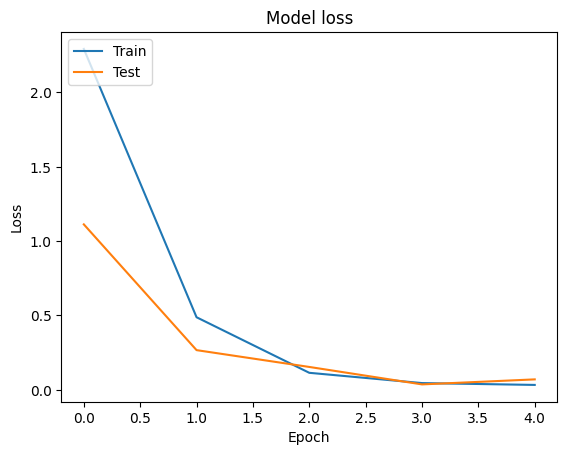

In [32]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [33]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [34]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [35]:
class_indices

{0: 'Bambusa_vulgaris(Golden_Bamboo)',
 1: 'Dendrocalamus_giganteus(Giant_Bamboo)',
 2: 'U72RT',
 3: 'new_green'}

In [36]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [37]:
# Example Usage
image_path = '/content/drive/My Drive/Projectcodes/Dataset/Bambusa_vulgaris(Golden_Bamboo)/534rotated0.jpg'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 188ms/step
Predicted Class Name: Bambusa_vulgaris(Golden_Bamboo)


**Save the model to Google drive or local**

In [38]:
model.save('/content/drive/My Drive/Projectcodes/Bamboo_classisfication.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
model.save('Bamboo_classisfication.h5')